In [9]:
!wget https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv

--2019-03-16 14:35:04--  https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.172.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.172.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3867 (3.8K) [text/plain]
Saving to: 'house-prices.csv'

house-prices.csv    100%[===================>]   3.78K  --.-KB/s    in 0s      

2019-03-16 14:35:08 (42.9 MB/s) - 'house-prices.csv' saved [3867/3867]



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#!pip install matplotlib

In [12]:
house_data = pd.read_csv('house-prices.csv')

In [13]:
house_data.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [19]:
house_data_price_sqft = house_data[['Price', 'SqFt']]

#### I. 1 plot the data

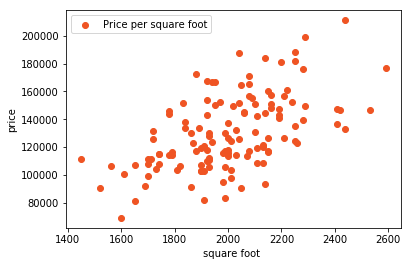

In [21]:
plt.scatter(house_data_price_sqft.SqFt, house_data_price_sqft.Price, c='#ef5423', label='Price per square foot')

plt.xlabel('square foot ')
plt.ylabel('price')
plt.legend()
plt.show()

Next step is to find the line that predict

I.2 Hypothesis function

Recall our hypothesis function is 

h_\theta (x) = \thetha_0  + \thetha_1*x

in function it will look like this 

In [22]:
def predictPrice(x,theta):
    return np.dot(x,theta)

In [62]:
def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return np.power((prediction - Y), 2).mean()/2

This will help to plot the line

In [79]:
min_area, max_area  = house_data_price_sqft.SqFt.min(), house_data_price_sqft.SqFt.max()

In [81]:
min_price, max_price = house_data_price_sqft.Price.min(), house_data_price_sqft.Price.max()

In [100]:
def plot_regression_line(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    # ploting what we have in the dataset
    plt.scatter(house_data_price_sqft.SqFt/1000, house_data_price_sqft.Price/1000, c='#ef5423', label='Price per square foot')
    # ploting the predicted value
    y_predicted = predictPrice(x,theta)
    plt.plot(x, y_predicted, color='g', label='regression line')
    plt.xlabel('square foot ')
    plt.ylabel('price')
    plt.legend()
    plt.show()

In [105]:
def gradient_descent_linear_regression(alpha=0.047,iter=2000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = house_data_price_sqft.SqFt/1000
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = house_data_price_sqft.Price/1000
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            plot_regression_line(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')
    return costs, theta

Iteration: 1,Cost = 5269.058297149111,theta = [ 6.13008516 12.41250906]


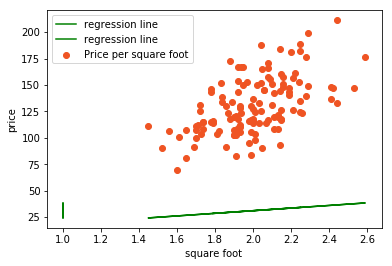

Iteration: 1001,Cost = 251.73758368836826,theta = [13.71141243 58.43546321]


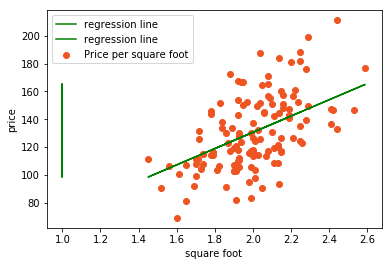

theta0 = 2000
theta1 = 2000
Costs = 2000


In [108]:
cost, theta = gradient_descent_linear_regression()

In [109]:
np.mean([1, 2, 3])

2.0

In [114]:
np.linspace(1, 2000).shape

(50,)